In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sb 
import numpy_financial as npf
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
df= pd.read_csv('downloads/ProsperLoanData.csv')
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,09:29.3,C,36,Completed,8/14/2009 0:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,28:07.9,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,00:47.1,HR,36,Completed,12/17/2009 0:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,02:35.0,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,38:39.1,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
df1 = df[['BorrowerRate','EstimatedReturn','ProsperRating (numeric)','ListingCategory (numeric)',' IsBorrowerHomeowner','CreditScoreRangeLower',
         'OpenCreditLines','InquiriesLast6Months','PublicRecordsLast12Months','BankcardUtilization','DebtToIncomeRatio','StatedMonthlyIncome','LoanOriginalAmount','LoanOriginationDate','LoanStatus']]

In [4]:
import datetime

In [5]:
df1['Datetime']= pd.to_datetime(df1['LoanOriginationDate'])

C:\Users\JAHANL~1\AppData\Local\Temp/ipykernel_1424/2603066674.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Datetime']= pd.to_datetime(df1['LoanOriginationDate'])


In [6]:
cutoff_date ='2009-12-31'
df1= df1.loc[df1['Datetime'] >= cutoff_date]

In [28]:
df1=df1.drop(['Datetime'],axis=1)

In [30]:
df1.drop(df1.index[np.where(df1['LoanStatus'] == 'Current')], inplace=True)
df1.drop(df1.index[np.where(df1['LoanStatus'] == 'Past Due (1-15 days)')], inplace=True)
df1.drop(df1.index[np.where(df1['LoanStatus'] == 'Past Due (16-30 days)')], inplace=True)
df1.drop(df1.index[np.where(df1['LoanStatus'] == 'Past Due (61-90 days)')], inplace=True)
df1.drop(df1.index[np.where(df1['LoanStatus'] == 'Past Due (31-60 days)')], inplace=True)
df1.drop(df1.index[np.where(df1['LoanStatus'] == 'Past Due (91-120 days)')], inplace=True)
df1.drop(df1.index[np.where(df1['LoanStatus'] == 'Past Due (>120 days)')], inplace=True)
df1.drop(df1.index[np.where(df1['LoanStatus'] == 'FinalPaymentInProgress')], inplace=True)


In [31]:
df1

,BorrowerRate,EstimatedReturn,ProsperRating (numeric),ListingCategory (numeric),IsBorrowerHomeowner,CreditScoreRangeLower,OpenCreditLines,InquiriesLast6Months,PublicRecordsLast12Months,BankcardUtilization,DebtToIncomeRatio,StatedMonthlyIncome,LoanOriginalAmount,LoanOriginationDate,LoanStatus
15,0.3177,0.1246,1.0,13,True,700.0,9.0,0.0,0.0,0.97,0.49,5500.000000,4000,4/19/2012 0:00,Defaulted
23,0.2419,0.1051,3.0,15,False,680.0,7.0,0.0,0.0,0.84,0.39,2500.000000,2000,4/26/2013 0:00,Defaulted
26,0.2809,0.1248,2.0,1,False,660.0,6.0,2.0,0.0,0.30,0.11,3885.916667,4000,2/21/2013 0:00,Completed
27,0.0920,0.0608,6.0,1,True,700.0,16.0,2.0,0.0,0.09,0.26,6666.666667,4000,6/24/2010 0:00,Completed
30,0.0999,0.0517,6.0,20,False,740.0,4.0,0.0,0.0,0.13,0.11,3750.000000,10000,2/7/2012 0:00,Completed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113908,0.3220,0.1557,2.0,3,False,700.0,15.0,1.0,0.0,0.00,NaN,2833.333333,7500,12/8/2010 0:00,Completed
113913,0.1030,0.0717,6.0,1,True,780.0,19.0,0.0,0.0,0.59,0.25,9750.000000,8000,5/5/2010 0:00,Completed
113928,0.1899,0.1147,4.0,3,False,740.0,3.0,0.0,0.0,0.00,0.27,2333.333333,2000,6/10/2011 0:00,Completed
113929,0.2639,0.1093,2.0,2,False,660.0,7.0,2.0,0.0,0.11,0.05,4333.333333,2500,7/10/2013 0:00,Completed


In [32]:
label = []

for i in range(len(df1)):
    if df1.iloc[i][' IsBorrowerHomeowner'] == True :
        label.append(1)
    else:
        label.append(0) 

In [33]:
df1.insert(12, 'Home', label , True)

In [34]:
df1

,BorrowerRate,EstimatedReturn,ProsperRating (numeric),ListingCategory (numeric),IsBorrowerHomeowner,CreditScoreRangeLower,OpenCreditLines,InquiriesLast6Months,PublicRecordsLast12Months,BankcardUtilization,DebtToIncomeRatio,StatedMonthlyIncome,Home,LoanOriginalAmount,LoanOriginationDate,LoanStatus
15,0.3177,0.1246,1.0,13,True,700.0,9.0,0.0,0.0,0.97,0.49,5500.000000,1,4000,4/19/2012 0:00,Defaulted
23,0.2419,0.1051,3.0,15,False,680.0,7.0,0.0,0.0,0.84,0.39,2500.000000,0,2000,4/26/2013 0:00,Defaulted
26,0.2809,0.1248,2.0,1,False,660.0,6.0,2.0,0.0,0.30,0.11,3885.916667,0,4000,2/21/2013 0:00,Completed
27,0.0920,0.0608,6.0,1,True,700.0,16.0,2.0,0.0,0.09,0.26,6666.666667,1,4000,6/24/2010 0:00,Completed
30,0.0999,0.0517,6.0,20,False,740.0,4.0,0.0,0.0,0.13,0.11,3750.000000,0,10000,2/7/2012 0:00,Completed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113908,0.3220,0.1557,2.0,3,False,700.0,15.0,1.0,0.0,0.00,NaN,2833.333333,0,7500,12/8/2010 0:00,Completed
113913,0.1030,0.0717,6.0,1,True,780.0,19.0,0.0,0.0,0.59,0.25,9750.000000,1,8000,5/5/2010 0:00,Completed
113928,0.1899,0.1147,4.0,3,False,740.0,3.0,0.0,0.0,0.00,0.27,2333.333333,0,2000,6/10/2011 0:00,Completed
113929,0.2639,0.1093,2.0,2,False,660.0,7.0,2.0,0.0,0.11,0.05,4333.333333,0,2500,7/10/2013 0:00,Completed


In [35]:
df1.drop([' IsBorrowerHomeowner'], axis=1)

,BorrowerRate,EstimatedReturn,ProsperRating (numeric),ListingCategory (numeric),CreditScoreRangeLower,OpenCreditLines,InquiriesLast6Months,PublicRecordsLast12Months,BankcardUtilization,DebtToIncomeRatio,StatedMonthlyIncome,Home,LoanOriginalAmount,LoanOriginationDate,LoanStatus
15,0.3177,0.1246,1.0,13,700.0,9.0,0.0,0.0,0.97,0.49,5500.000000,1,4000,4/19/2012 0:00,Defaulted
23,0.2419,0.1051,3.0,15,680.0,7.0,0.0,0.0,0.84,0.39,2500.000000,0,2000,4/26/2013 0:00,Defaulted
26,0.2809,0.1248,2.0,1,660.0,6.0,2.0,0.0,0.30,0.11,3885.916667,0,4000,2/21/2013 0:00,Completed
27,0.0920,0.0608,6.0,1,700.0,16.0,2.0,0.0,0.09,0.26,6666.666667,1,4000,6/24/2010 0:00,Completed
30,0.0999,0.0517,6.0,20,740.0,4.0,0.0,0.0,0.13,0.11,3750.000000,0,10000,2/7/2012 0:00,Completed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113908,0.3220,0.1557,2.0,3,700.0,15.0,1.0,0.0,0.00,NaN,2833.333333,0,7500,12/8/2010 0:00,Completed
113913,0.1030,0.0717,6.0,1,780.0,19.0,0.0,0.0,0.59,0.25,9750.000000,1,8000,5/5/2010 0:00,Completed
113928,0.1899,0.1147,4.0,3,740.0,3.0,0.0,0.0,0.00,0.27,2333.333333,0,2000,6/10/2011 0:00,Completed
113929,0.2639,0.1093,2.0,2,660.0,7.0,2.0,0.0,0.11,0.05,4333.333333,0,2500,7/10/2013 0:00,Completed


In [36]:
labels = []

for i in range(len(df1)):
    if df1.iloc[i]['LoanStatus'] == 'Completed' :
        labels.append(1)
    else:
        labels.append(0) 

In [37]:
df1.insert(12, 'Loanstatu', labels , True)

In [38]:
df1

,BorrowerRate,EstimatedReturn,ProsperRating (numeric),ListingCategory (numeric),IsBorrowerHomeowner,CreditScoreRangeLower,OpenCreditLines,InquiriesLast6Months,PublicRecordsLast12Months,BankcardUtilization,DebtToIncomeRatio,StatedMonthlyIncome,Loanstatu,Home,LoanOriginalAmount,LoanOriginationDate,LoanStatus
15,0.3177,0.1246,1.0,13,True,700.0,9.0,0.0,0.0,0.97,0.49,5500.000000,0,1,4000,4/19/2012 0:00,Defaulted
23,0.2419,0.1051,3.0,15,False,680.0,7.0,0.0,0.0,0.84,0.39,2500.000000,0,0,2000,4/26/2013 0:00,Defaulted
26,0.2809,0.1248,2.0,1,False,660.0,6.0,2.0,0.0,0.30,0.11,3885.916667,1,0,4000,2/21/2013 0:00,Completed
27,0.0920,0.0608,6.0,1,True,700.0,16.0,2.0,0.0,0.09,0.26,6666.666667,1,1,4000,6/24/2010 0:00,Completed
30,0.0999,0.0517,6.0,20,False,740.0,4.0,0.0,0.0,0.13,0.11,3750.000000,1,0,10000,2/7/2012 0:00,Completed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113908,0.3220,0.1557,2.0,3,False,700.0,15.0,1.0,0.0,0.00,NaN,2833.333333,1,0,7500,12/8/2010 0:00,Completed
113913,0.1030,0.0717,6.0,1,True,780.0,19.0,0.0,0.0,0.59,0.25,9750.000000,1,1,8000,5/5/2010 0:00,Completed
113928,0.1899,0.1147,4.0,3,False,740.0,3.0,0.0,0.0,0.00,0.27,2333.333333,1,0,2000,6/10/2011 0:00,Completed
113929,0.2639,0.1093,2.0,2,False,660.0,7.0,2.0,0.0,0.11,0.05,4333.333333,1,0,2500,7/10/2013 0:00,Completed


In [39]:
df1=df1.drop(['LoanStatus'], axis=1)

In [40]:
df1.columns

Index(['BorrowerRate', 'EstimatedReturn', 'ProsperRating (numeric)',
       'ListingCategory (numeric)', ' IsBorrowerHomeowner',
       'CreditScoreRangeLower', 'OpenCreditLines', 'InquiriesLast6Months',
       'PublicRecordsLast12Months', 'BankcardUtilization', 'DebtToIncomeRatio',
       'StatedMonthlyIncome', 'Loanstatu', 'Home', 'LoanOriginalAmount',
       'LoanOriginationDate'],
      dtype='object')

In [42]:
df1= df1.drop([' IsBorrowerHomeowner'], axis=1)

In [43]:
df1

,BorrowerRate,EstimatedReturn,ProsperRating (numeric),ListingCategory (numeric),CreditScoreRangeLower,OpenCreditLines,InquiriesLast6Months,PublicRecordsLast12Months,BankcardUtilization,DebtToIncomeRatio,StatedMonthlyIncome,Loanstatu,Home,LoanOriginalAmount,LoanOriginationDate
15,0.3177,0.1246,1.0,13,700.0,9.0,0.0,0.0,0.97,0.49,5500.000000,0,1,4000,4/19/2012 0:00
23,0.2419,0.1051,3.0,15,680.0,7.0,0.0,0.0,0.84,0.39,2500.000000,0,0,2000,4/26/2013 0:00
26,0.2809,0.1248,2.0,1,660.0,6.0,2.0,0.0,0.30,0.11,3885.916667,1,0,4000,2/21/2013 0:00
27,0.0920,0.0608,6.0,1,700.0,16.0,2.0,0.0,0.09,0.26,6666.666667,1,1,4000,6/24/2010 0:00
30,0.0999,0.0517,6.0,20,740.0,4.0,0.0,0.0,0.13,0.11,3750.000000,1,0,10000,2/7/2012 0:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113908,0.3220,0.1557,2.0,3,700.0,15.0,1.0,0.0,0.00,NaN,2833.333333,1,0,7500,12/8/2010 0:00
113913,0.1030,0.0717,6.0,1,780.0,19.0,0.0,0.0,0.59,0.25,9750.000000,1,1,8000,5/5/2010 0:00
113928,0.1899,0.1147,4.0,3,740.0,3.0,0.0,0.0,0.00,0.27,2333.333333,1,0,2000,6/10/2011 0:00
113929,0.2639,0.1093,2.0,2,660.0,7.0,2.0,0.0,0.11,0.05,4333.333333,1,0,2500,7/10/2013 0:00


In [44]:
df1.columns

Index(['BorrowerRate', 'EstimatedReturn', 'ProsperRating (numeric)',
       'ListingCategory (numeric)', 'CreditScoreRangeLower', 'OpenCreditLines',
       'InquiriesLast6Months', 'PublicRecordsLast12Months',
       'BankcardUtilization', 'DebtToIncomeRatio', 'StatedMonthlyIncome',
       'Loanstatu', 'Home', 'LoanOriginalAmount', 'LoanOriginationDate'],
      dtype='object')

In [45]:
df1.shape

(24176, 15)

In [46]:
df1= df1.drop(['LoanOriginationDate'], axis=1)

df1

In [47]:
df1

,BorrowerRate,EstimatedReturn,ProsperRating (numeric),ListingCategory (numeric),CreditScoreRangeLower,OpenCreditLines,InquiriesLast6Months,PublicRecordsLast12Months,BankcardUtilization,DebtToIncomeRatio,StatedMonthlyIncome,Loanstatu,Home,LoanOriginalAmount
15,0.3177,0.1246,1.0,13,700.0,9.0,0.0,0.0,0.97,0.49,5500.000000,0,1,4000
23,0.2419,0.1051,3.0,15,680.0,7.0,0.0,0.0,0.84,0.39,2500.000000,0,0,2000
26,0.2809,0.1248,2.0,1,660.0,6.0,2.0,0.0,0.30,0.11,3885.916667,1,0,4000
27,0.0920,0.0608,6.0,1,700.0,16.0,2.0,0.0,0.09,0.26,6666.666667,1,1,4000
30,0.0999,0.0517,6.0,20,740.0,4.0,0.0,0.0,0.13,0.11,3750.000000,1,0,10000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113908,0.3220,0.1557,2.0,3,700.0,15.0,1.0,0.0,0.00,NaN,2833.333333,1,0,7500
113913,0.1030,0.0717,6.0,1,780.0,19.0,0.0,0.0,0.59,0.25,9750.000000,1,1,8000
113928,0.1899,0.1147,4.0,3,740.0,3.0,0.0,0.0,0.00,0.27,2333.333333,1,0,2000
113929,0.2639,0.1093,2.0,2,660.0,7.0,2.0,0.0,0.11,0.05,4333.333333,1,0,2500


In [48]:
df1.shape

(24176, 14)

In [49]:
df1

,BorrowerRate,EstimatedReturn,ProsperRating (numeric),ListingCategory (numeric),CreditScoreRangeLower,OpenCreditLines,InquiriesLast6Months,PublicRecordsLast12Months,BankcardUtilization,DebtToIncomeRatio,StatedMonthlyIncome,Loanstatu,Home,LoanOriginalAmount
15,0.3177,0.1246,1.0,13,700.0,9.0,0.0,0.0,0.97,0.49,5500.000000,0,1,4000
23,0.2419,0.1051,3.0,15,680.0,7.0,0.0,0.0,0.84,0.39,2500.000000,0,0,2000
26,0.2809,0.1248,2.0,1,660.0,6.0,2.0,0.0,0.30,0.11,3885.916667,1,0,4000
27,0.0920,0.0608,6.0,1,700.0,16.0,2.0,0.0,0.09,0.26,6666.666667,1,1,4000
30,0.0999,0.0517,6.0,20,740.0,4.0,0.0,0.0,0.13,0.11,3750.000000,1,0,10000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113908,0.3220,0.1557,2.0,3,700.0,15.0,1.0,0.0,0.00,NaN,2833.333333,1,0,7500
113913,0.1030,0.0717,6.0,1,780.0,19.0,0.0,0.0,0.59,0.25,9750.000000,1,1,8000
113928,0.1899,0.1147,4.0,3,740.0,3.0,0.0,0.0,0.00,0.27,2333.333333,1,0,2000
113929,0.2639,0.1093,2.0,2,660.0,7.0,2.0,0.0,0.11,0.05,4333.333333,1,0,2500


In [50]:
df1=df1.dropna(subset=['EstimatedReturn', 'DebtToIncomeRatio', 'ProsperRating (numeric)'])

In [51]:
df1.shape

(21310, 14)

In [52]:
df1.isnull().sum()

BorrowerRate                 0
EstimatedReturn              0
ProsperRating (numeric)      0
ListingCategory (numeric)    0
CreditScoreRangeLower        0
OpenCreditLines              0
InquiriesLast6Months         0
PublicRecordsLast12Months    0
BankcardUtilization          0
DebtToIncomeRatio            0
StatedMonthlyIncome          0
Loanstatu                    0
Home                         0
LoanOriginalAmount           0
dtype: int64

In [53]:
from sklearn.utils import shuffle

In [54]:
df2 = shuffle(df1)

In [55]:
from sklearn.model_selection import train_test_split

df2.columns

In [62]:
df2.columns

Index(['BorrowerRate', 'EstimatedReturn', 'ProsperRating (numeric)',
       'ListingCategory (numeric)', 'CreditScoreRangeLower', 'OpenCreditLines',
       'InquiriesLast6Months', 'PublicRecordsLast12Months',
       'BankcardUtilization', 'DebtToIncomeRatio', 'StatedMonthlyIncome',
       'Loanstatu', 'Home', 'LoanOriginalAmount'],
      dtype='object')

In [74]:
y= df2['EstimatedReturn']

KeyError: 'EstimatedReturn'

In [70]:
df2.pop('EstimatedReturn')
#df2.drop([''])
#del df2([''])

KeyError: 'EstimatedReturn'

In [71]:
df2

,BorrowerRate,ProsperRating (numeric),ListingCategory (numeric),CreditScoreRangeLower,OpenCreditLines,InquiriesLast6Months,PublicRecordsLast12Months,BankcardUtilization,DebtToIncomeRatio,StatedMonthlyIncome,Loanstatu,Home,LoanOriginalAmount
13808,0.0974,6.0,1,800.0,9.0,1.0,0.0,0.05,0.10,8333.333333,1,1,3500
11404,0.1140,6.0,1,720.0,6.0,0.0,0.0,0.27,0.13,2500.000000,1,0,6000
54212,0.1515,5.0,1,740.0,4.0,2.0,0.0,0.41,0.09,6666.666667,1,0,8500
66181,0.2555,4.0,1,780.0,11.0,3.0,0.0,0.38,0.18,14583.333330,1,1,25000
83589,0.1039,6.0,1,720.0,15.0,1.0,0.0,0.32,0.29,4750.000000,1,0,15000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
102435,0.3199,1.0,1,680.0,12.0,0.0,0.0,1.00,0.35,3916.666667,0,1,4000
71176,0.1151,6.0,2,780.0,30.0,1.0,0.0,0.51,0.22,12083.333330,1,1,12000
40609,0.1449,5.0,1,640.0,11.0,1.0,0.0,0.31,0.30,5666.666667,1,1,6000
28056,0.1490,5.0,1,760.0,14.0,1.0,0.0,0.27,0.28,3675.000000,1,1,9000


In [72]:
y= df1['EstimatedReturn']

In [73]:
y

15        0.1246
23        0.1051
26        0.1248
27        0.0608
30        0.0517
           ...  
113905    0.1246
113913    0.0717
113928    0.1147
113929    0.1093
113935    0.1595
Name: EstimatedReturn, Length: 21310, dtype: float64

In [75]:
y=shuffle(y)

In [76]:
y

82211     0.1487
85018     0.1048
33393     0.1115
39112     0.1150
41308     0.1550
           ...  
113412    0.0994
90997     0.1110
42056     0.0449
2886      0.1638
37129     0.1243
Name: EstimatedReturn, Length: 21310, dtype: float64

In [92]:
x_train, x_test , y_train, y_test = train_test_split(x, y , train_size=.7)
x.shape, y.shape, x_train.shape, x_test.shape , y_train.shape, y_test.shape

((21310, 13), (21310,), (14916, 13), (6394, 13), (14916,), (6394,))

In [78]:
x=df2

In [79]:
x

,BorrowerRate,ProsperRating (numeric),ListingCategory (numeric),CreditScoreRangeLower,OpenCreditLines,InquiriesLast6Months,PublicRecordsLast12Months,BankcardUtilization,DebtToIncomeRatio,StatedMonthlyIncome,Loanstatu,Home,LoanOriginalAmount
13808,0.0974,6.0,1,800.0,9.0,1.0,0.0,0.05,0.10,8333.333333,1,1,3500
11404,0.1140,6.0,1,720.0,6.0,0.0,0.0,0.27,0.13,2500.000000,1,0,6000
54212,0.1515,5.0,1,740.0,4.0,2.0,0.0,0.41,0.09,6666.666667,1,0,8500
66181,0.2555,4.0,1,780.0,11.0,3.0,0.0,0.38,0.18,14583.333330,1,1,25000
83589,0.1039,6.0,1,720.0,15.0,1.0,0.0,0.32,0.29,4750.000000,1,0,15000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
102435,0.3199,1.0,1,680.0,12.0,0.0,0.0,1.00,0.35,3916.666667,0,1,4000
71176,0.1151,6.0,2,780.0,30.0,1.0,0.0,0.51,0.22,12083.333330,1,1,12000
40609,0.1449,5.0,1,640.0,11.0,1.0,0.0,0.31,0.30,5666.666667,1,1,6000
28056,0.1490,5.0,1,760.0,14.0,1.0,0.0,0.27,0.28,3675.000000,1,1,9000


In [81]:
from sklearn.tree import DecisionTreeRegressor


In [93]:
regr= DecisionTreeRegressor()
regr.fit(x_train, y_train)
y_pred = regr.predict(x_test)
y_pred.shape

(6394,)

In [94]:
y_pred

array([0.1363, 0.1144, 0.0861, ..., 0.1232, 0.1454, 0.0524])

In [96]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

0.0028644918645605254

[Text(173.74595432932017, 215.07652173913044, 'X[7] <= 0.125\nmse = 0.001\nsamples = 14916\nvalue = 0.107'),
 Text(38.28016953933711, 210.3495652173913, 'X[0] <= 0.047\nmse = 0.001\nsamples = 2513\nvalue = 0.109'),
 Text(28.60035080656501, 205.62260869565216, 'X[3] <= 830.0\nmse = 0.0\nsamples = 3\nvalue = 0.157'),
 Text(28.577625473018145, 200.89565217391305, 'X[9] <= 7083.333\nmse = 0.0\nsamples = 2\nvalue = 0.169'),
 Text(28.554900139471282, 196.1686956521739, 'mse = 0.0\nsamples = 1\nvalue = 0.163'),
 Text(28.60035080656501, 196.1686956521739, 'mse = 0.0\nsamples = 1\nvalue = 0.176'),
 Text(28.623076140111873, 200.89565217391305, 'mse = -0.0\nsamples = 1\nvalue = 0.132'),
 Text(47.9599882721092, 205.62260869565216, 'X[8] <= 0.445\nmse = 0.001\nsamples = 2510\nvalue = 0.109'),
 Text(40.22597631778384, 200.89565217391305, 'X[3] <= 810.0\nmse = 0.001\nsamples = 2417\nvalue = 0.108'),
 Text(28.64580147365874, 196.1686956521739, 'X[8] <= 0.145\nmse = 0.001\nsamples = 2148\nvalue = 0.108

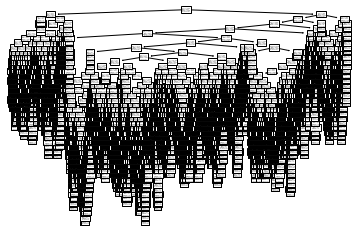

In [97]:
from sklearn import tree
tree.plot_tree(regr)  

In [100]:
regrl= LinearRegression()
regrl.fit(x_train, y_train)
y_predl = regrl.predict(x_test)
y_predl.shape

(6394,)

In [99]:
from sklearn.linear_model import LinearRegression


In [101]:
y_predl

array([0.10712233, 0.10689305, 0.10758616, ..., 0.10677001, 0.1080816 ,
       0.10790938])

In [105]:
regrl.score(x_train, y_train)

0.0007986436612218428

In [106]:
regrl.score(x_test, y_test)

-0.0007855737370703331

In [107]:
regrl.score(x, y)

0.0003863108692713224

In [110]:
regrl.coef_
regrl.intercept_
regrl.predict(x_test)

array([0.10712233, 0.10689305, 0.10758616, ..., 0.10677001, 0.1080816 ,
       0.10790938])

In [111]:
regrl.coef_

array([-1.15875641e-02, -5.95205020e-04, -5.76809184e-05,  1.55648581e-05,
       -1.08400958e-04, -1.49476701e-04, -2.04376158e-03,  1.62419050e-04,
       -2.99187466e-04, -1.10833110e-08,  2.46277668e-04, -2.50793639e-04,
        8.84846795e-10])

In [112]:
regrl.intercept_


0.10203414952273762